In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
dataTest = pd.read_csv("dataset/mnist_test.csv")
dataTrain = pd.read_csv("dataset/mnist_train.csv")

dataTest = np.array(dataTest)
dataTrain = np.array(dataTrain)

m, n = dataTrain.shape
np.random.shuffle(dataTrain)
np.random.shuffle(dataTest)

dataTrain = dataTrain[0:m].T
dataTest = dataTest[0:m].T


yTest = dataTest[0]
xTest = dataTest[1:n]
yTrain = dataTrain[0]
xTrain = dataTrain[1:n]

xTest = xTest / 255.
xTrain = xTrain / 255.


In [4]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    oneHotY = np.zeros((y.size, y.max() + 1))
    oneHotY[np.arange(y.size), y] = 1
    oneHotY = oneHotY.T
    return oneHotY

def deriveRelu(z):
    return z > 0

def backward_prop(z1, a1, z2, a2, w1, w2, x, y):
    m = y.size
    oneHotY = one_hot(y)
    dz2 = a2 - oneHotY
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriveRelu(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [5]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print("Iteration:", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), y))
    return w1, b1, w2, b2

In [6]:
w1, b1, w2, b2 = gradient_descent(xTrain, yTrain, 1000, 0.1)

Iteration: 0
[7 9 5 ... 4 3 5] [2 2 5 ... 3 2 5]
Accuracy:  0.13078333333333333
Iteration: 50
[7 2 0 ... 8 3 0] [2 2 5 ... 3 2 5]
Accuracy:  0.35258333333333336
Iteration: 100
[2 2 0 ... 3 8 0] [2 2 5 ... 3 2 5]
Accuracy:  0.52
Iteration: 150
[2 2 5 ... 3 2 0] [2 2 5 ... 3 2 5]
Accuracy:  0.6206666666666667
Iteration: 200
[2 2 5 ... 3 2 0] [2 2 5 ... 3 2 5]
Accuracy:  0.7029666666666666
Iteration: 250
[2 1 5 ... 3 8 0] [2 2 5 ... 3 2 5]
Accuracy:  0.7834833333333333
Iteration: 300
[2 2 5 ... 3 8 0] [2 2 5 ... 3 2 5]
Accuracy:  0.8078666666666666
Iteration: 350
[2 2 5 ... 3 8 0] [2 2 5 ... 3 2 5]
Accuracy:  0.8215666666666667
Iteration: 400
[2 2 5 ... 3 2 0] [2 2 5 ... 3 2 5]
Accuracy:  0.8321166666666666
Iteration: 450
[2 2 5 ... 3 2 0] [2 2 5 ... 3 2 5]
Accuracy:  0.8398166666666667
Iteration: 500
[2 2 5 ... 3 2 0] [2 2 5 ... 3 2 5]
Accuracy:  0.8460166666666666
Iteration: 550
[2 2 5 ... 3 2 0] [2 2 5 ... 3 2 5]
Accuracy:  0.8516333333333334
Iteration: 600
[2 2 5 ... 3 2 0] [2 2 5 ...

In [7]:
def make_prediction(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_predictions(index, w1, b1, w2, b2):
    current_image = xTrain[:, index, None]
    prediction = make_prediction(xTrain[:, index, None], w1, b1, w2, b2)
    label = yTrain[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray
    plt.imshow(current_image, interpolation="nearest")
    plt.show

Prediction:  [2]
Label:  2
Prediction:  [5]
Label:  5
Prediction:  [0]
Label:  0
Prediction:  [3]
Label:  3


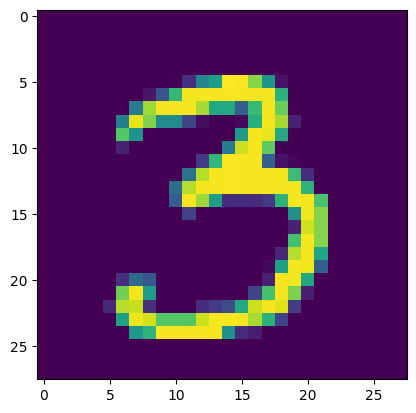

In [11]:
test_predictions(1, w1, b1, w2, b2)
test_predictions(2, w1, b1, w2, b2)
test_predictions(3, w1, b1, w2, b2)
test_predictions(4, w1, b1, w2, b2)
test_predictions(5, w1, b1, w2, b2)
test_predictions(6, w1, b1, w2, b2)
test_predictions(7, w1, b1, w2, b2)
test_predictions(8, w1, b1, w2, b2)
test_predictions(9, w1, b1, w2, b2)
test_predictions(10, w1, b1, w2, b2)

In [12]:
dev_predictions = make_prediction(xTest, w1, b1, w2, b2)
get_accuracy(dev_predictions, yTest)

[3 0 8 ... 2 8 8] [5 0 8 ... 2 8 8]


0.8798